## Local outlier factor

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=300, noise=0.1)

In [2]:
x

array([[ 1.95090764e+00, -1.77411105e-01],
       [ 7.42542210e-01,  5.76476631e-01],
       [ 5.45154559e-01, -4.30865274e-01],
       [ 4.26181619e-02,  5.95303972e-01],
       [-3.49075677e-02, -3.71489461e-02],
       [ 5.63644987e-01,  8.63807089e-01],
       [ 8.13313687e-01,  3.07663675e-01],
       [ 6.41302673e-01,  5.94178829e-01],
       [ 7.28684377e-01,  6.56323340e-01],
       [-3.39432515e-02, -2.23466292e-01],
       [ 1.81195644e+00, -2.61508938e-01],
       [ 1.97064175e+00,  1.81632053e-02],
       [ 1.75442004e+00,  4.32462164e-02],
       [ 3.60230948e-01, -1.01269078e-01],
       [ 1.82123397e+00,  3.91722939e-01],
       [ 8.55713105e-01,  4.92315501e-01],
       [ 2.85018809e-01, -1.25981535e-01],
       [ 1.58866387e+00, -1.30672427e-01],
       [ 2.86280314e-03,  1.48707334e-01],
       [-7.76208552e-01,  4.82145442e-01],
       [ 7.95840109e-01,  7.91435362e-01],
       [ 1.07547431e+00, -1.79042173e-01],
       [ 7.31013422e-01,  6.94221860e-01],
       [ 5.

In [3]:
y

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], d

In [6]:
x_outlier = np.random.uniform(low=-3, high=3, size = (20,2))
x = np.vstack((x, x_outlier))
x

array([[ 1.95090764e+00, -1.77411105e-01],
       [ 7.42542210e-01,  5.76476631e-01],
       [ 5.45154559e-01, -4.30865274e-01],
       [ 4.26181619e-02,  5.95303972e-01],
       [-3.49075677e-02, -3.71489461e-02],
       [ 5.63644987e-01,  8.63807089e-01],
       [ 8.13313687e-01,  3.07663675e-01],
       [ 6.41302673e-01,  5.94178829e-01],
       [ 7.28684377e-01,  6.56323340e-01],
       [-3.39432515e-02, -2.23466292e-01],
       [ 1.81195644e+00, -2.61508938e-01],
       [ 1.97064175e+00,  1.81632053e-02],
       [ 1.75442004e+00,  4.32462164e-02],
       [ 3.60230948e-01, -1.01269078e-01],
       [ 1.82123397e+00,  3.91722939e-01],
       [ 8.55713105e-01,  4.92315501e-01],
       [ 2.85018809e-01, -1.25981535e-01],
       [ 1.58866387e+00, -1.30672427e-01],
       [ 2.86280314e-03,  1.48707334e-01],
       [-7.76208552e-01,  4.82145442e-01],
       [ 7.95840109e-01,  7.91435362e-01],
       [ 1.07547431e+00, -1.79042173e-01],
       [ 7.31013422e-01,  6.94221860e-01],
       [ 5.

In [7]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
out 

LocalOutlierFactor(contamination=0.1)

In [12]:
# fit
y_pred = out.fit_predict(x)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

In [13]:
# Seprate normal data points >> inlier and outlier
x_inliners = x[y_pred==1] # 
x_outliers = x[y_pred==-1]

In [14]:
x_inliners

array([[ 1.95090764e+00, -1.77411105e-01],
       [ 7.42542210e-01,  5.76476631e-01],
       [ 5.45154559e-01, -4.30865274e-01],
       [ 4.26181619e-02,  5.95303972e-01],
       [-3.49075677e-02, -3.71489461e-02],
       [ 5.63644987e-01,  8.63807089e-01],
       [ 8.13313687e-01,  3.07663675e-01],
       [ 6.41302673e-01,  5.94178829e-01],
       [ 7.28684377e-01,  6.56323340e-01],
       [-3.39432515e-02, -2.23466292e-01],
       [ 1.81195644e+00, -2.61508938e-01],
       [ 1.97064175e+00,  1.81632053e-02],
       [ 1.75442004e+00,  4.32462164e-02],
       [ 3.60230948e-01, -1.01269078e-01],
       [ 1.82123397e+00,  3.91722939e-01],
       [ 8.55713105e-01,  4.92315501e-01],
       [ 2.85018809e-01, -1.25981535e-01],
       [ 1.58866387e+00, -1.30672427e-01],
       [ 2.86280314e-03,  1.48707334e-01],
       [-7.76208552e-01,  4.82145442e-01],
       [ 7.95840109e-01,  7.91435362e-01],
       [ 1.07547431e+00, -1.79042173e-01],
       [ 7.31013422e-01,  6.94221860e-01],
       [ 5.

In [15]:
x_outliers

array([[ 1.08162129e+00, -4.77505199e-02],
       [-9.71075498e-01, -1.04298932e-01],
       [-9.62935511e-01, -8.75359671e-02],
       [ 2.18349797e+00,  4.94316360e-01],
       [ 1.06546274e+00,  4.42337564e-02],
       [ 1.89658594e+00,  5.24578031e-01],
       [ 9.39922675e-01,  2.28971511e-02],
       [ 1.99736096e+00,  5.74963965e-01],
       [ 8.75093891e-01, -7.81533324e-01],
       [ 1.05190716e+00, -1.95173390e-02],
       [ 8.69367285e-01,  2.54608006e-02],
       [-1.34086471e-01,  5.80943880e-01],
       [-1.10669476e+00,  2.82065803e-03],
       [-1.25380027e-01, -1.98725828e+00],
       [ 1.93195237e+00,  1.18418529e+00],
       [-1.11725289e+00,  8.52999138e-01],
       [-8.04935295e-01, -1.97321628e+00],
       [-2.01826034e+00,  5.94058822e-01],
       [ 1.91093915e+00,  7.57725815e-01],
       [ 1.79091336e+00,  2.84094997e+00],
       [ 2.93505951e+00,  2.70380757e+00],
       [-1.88586337e+00, -2.77772081e+00],
       [ 1.47141092e+00, -2.30664126e+00],
       [ 2.

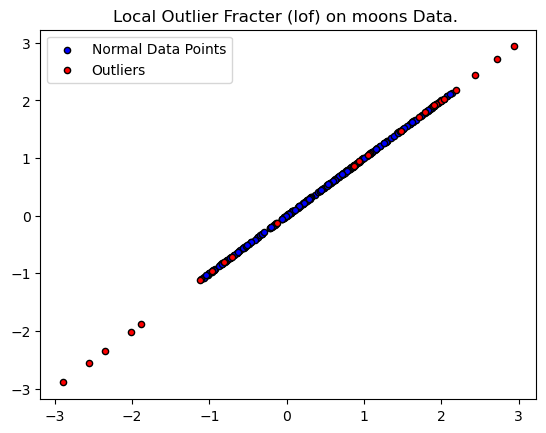

In [16]:
# ploting
plt.title("Local Outlier Fracter (lof) on moons Data. ")
plt.scatter(x_inliners[:, 0], x_inliners[:, 0], color='b', s=20, edgecolors='k', label="Normal Data Points")
plt.scatter(x_outliers[:, 0], x_outliers[:, 0], color='r', s=20, edgecolors='k', label="Outliers")
plt.legend()
plt.show()